Some explanation of terms at https://www.intensivregister.de/#/aktuelle-lage/zeitreihen

Useful plots
- time series of available intensive care beds etc: https://www.intensivregister.de/#/aktuelle-lage/zeitreihen
- age distribution of intensiv care patients: https://www.intensivregister.de/#/aktuelle-lage/altersstruktur

In [1]:
# %config InlineBackend.figure_formats = ['svg']

%load_ext autoreload
%autoreload 2

import pandas as pd
# pd.options.plotting.backend = "plotly"

import matplotlib.pyplot as plt

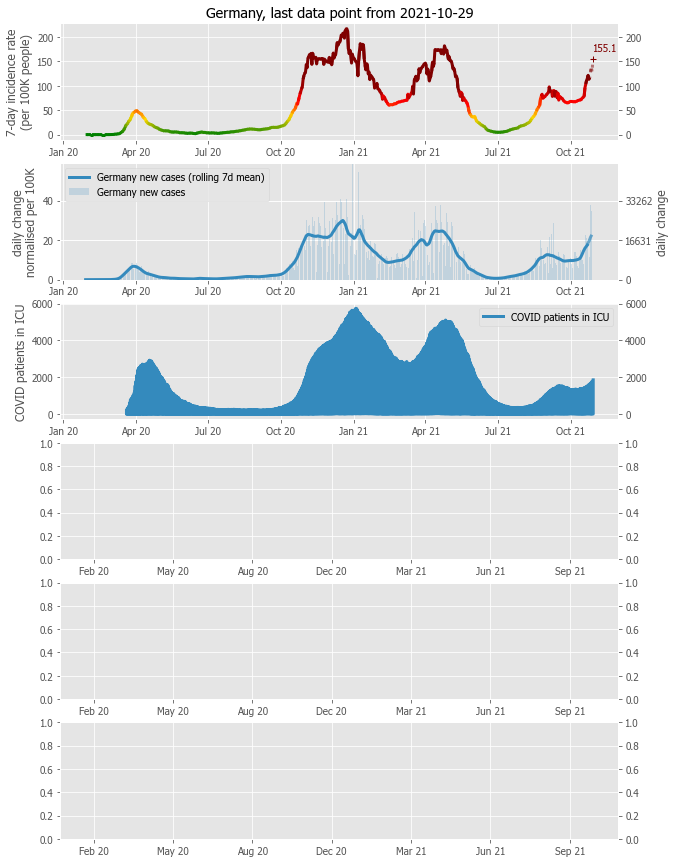

In [2]:
import oscovida as ov
ov.overview_divi();

In [3]:
def fetch_divi_data():

    def fix_index(data: pd.DataFrame):
        d2 = data.set_index(pd.to_datetime(data['Datum'], utc=True))
        d2.drop(labels=['Datum'], axis=1, inplace=True)
        return d2
        
    # for all of Germany, split according to Children and adults
    data = fix_index(pd.read_csv("https://diviexchange.blob.core.windows.net/%24web/zeitreihe-deutschland.csv"))

    # for adults only, split according to country
    data_by_country = fix_index(pd.read_csv("https://diviexchange.blob.core.windows.net/%24web/zeitreihe-bundeslaender.csv"))
    
    # Age distribution
    data_by_age = fix_index(pd.read_csv("https://diviexchange.blob.core.windows.net/%24web/bund-covid-altersstruktur-zeitreihe_ab-2021-04-29.csv"))
    
    return data, data_by_country, data_by_age
    

In [4]:
data, data_by_country, data_by_age = fetch_divi_data()

In [5]:
data.shape, data.columns

((1178, 14),
 Index(['Bundesland', 'Behandlungsgruppe', 'Anzahl_Meldebereiche',
        'Aktuelle_COVID_Faelle_ITS', 'Belegte_Intensivbetten',
        'Freie_Intensivbetten', '7_Tage_Notfallreserve',
        'Freie_IV_Kapazitaeten_Gesamt', 'Freie_IV_Kapazitaeten_Davon_COVID',
        'Betriebssituation_Regulaerer_Betrieb',
        'Betriebssituation_Teilweise_Eingeschraenkt',
        'Betriebssituation_Eingeschraenkt', 'Betriebssituation_Keine_Angabe',
        'faelle_covid_erstaufnahmen'],
       dtype='object'))

In [6]:
# accumulate adults and children
data = data.groupby('Datum').sum()


<AxesSubplot:xlabel='Datum'>

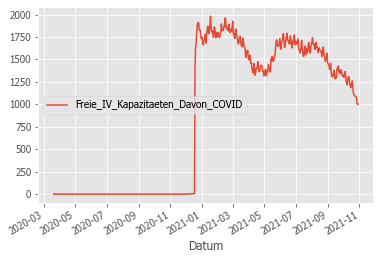

In [7]:
data.plot(y="Freie_IV_Kapazitaeten_Davon_COVID")

In [8]:
data["2020-12-15":]['Freie_IV_Kapazitaeten_Davon_COVID']

Datum
2020-12-15 11:15:00+00:00       6
2020-12-16 11:15:00+00:00       5
2020-12-17 11:15:00+00:00       5
2020-12-18 11:15:00+00:00    1386
2020-12-19 11:15:00+00:00    1623
                             ... 
2021-10-25 10:15:00+00:00    1086
2021-10-26 10:15:00+00:00    1076
2021-10-27 10:15:00+00:00    1013
2021-10-28 10:15:00+00:00    1000
2021-10-29 10:15:00+00:00    1001
Name: Freie_IV_Kapazitaeten_Davon_COVID, Length: 319, dtype: int64

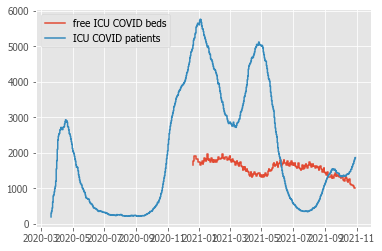

In [27]:


#ax.plot(data.index, data['Aktuelle_COVID_Faelle_ITS'])
free_covid_icu_beds = data['Freie_IV_Kapazitaeten_Davon_COVID']
# only useful data from 20 December 2020
free_covid_beds = free_covid_icu_beds["2020-12-20":]
covid_patients = data['Aktuelle_COVID_Faelle_ITS']

fig, ax = plt.subplots()
ax.step(free_covid_beds.index, free_covid_beds, label='free ICU COVID beds')
ax.step(covid_patients.index, covid_patients.values, label='ICU COVID patients')
ax.legend()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 589 and the array at index 1 has size 314

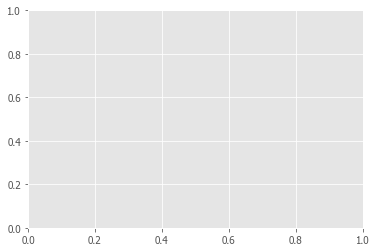

In [31]:
fig, ax = plt.subplots()
ax.stackplot(free_covid_beds.index, covid_patients, free_covid_beds) # , label='free ICU COVID beds')
#ax.step(covid_patients.index, covid_patients.values, label='ICU COVID patients')
#ax.legend()

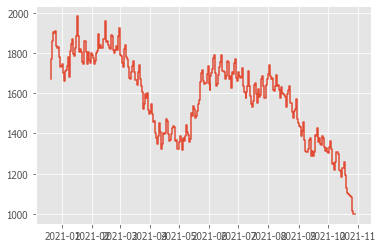

In [10]:
fig, ax = plt.subplots()
ax.step(pd.to_datetime(free_covid_beds.index), free_covid_beds.values)

In [33]:
data['Aktuelle_COVID_Faelle_ITS'].tail()

Datum
2021-10-27 10:15:00+00:00       7
2021-10-28 10:15:00+00:00    1803
2021-10-28 10:15:00+00:00       8
2021-10-29 10:15:00+00:00       8
2021-10-29 10:15:00+00:00    1860
Name: Aktuelle_COVID_Faelle_ITS, dtype: int64

In [ ]:
import oscovida as ov
ov.overview("Germany");

In [ ]:
data_by_country.tail()

In [ ]:
data_by_age.tail()

In [ ]:
da.shape

In [ ]:
db.shape

In [ ]:
d2 = data.set_index(pd.to_datetime(data['Datum'], utc=True))
d2.drop(labels=['Datum'], axis=1, inplace=True)

In [ ]:
d2.index

In [ ]:
adults = d2[d2['Behandlungsgruppe']=='ERWACHSENE']

In [ ]:
adults.columns

In [ ]:
adults.plot(y=['Freie_Intensivbetten', 'Freie_IV_Kapazitaeten_Gesamt', 'Freie_IV_Kapazitaeten_Davon_COVID'])

In [ ]:
adults.plot(y="Anzahl_Meldebereiche")

In [ ]:
adults.plot(y=['Aktuelle_COVID_Faelle_ITS', 'Belegte_Intensivbetten'])

In [ ]:
toplot = adults
toplot = toplot.drop(['Bundesland'], axis=1)

In [ ]:
import matplotlib.pyplot as plt
pd.options.plotting.backend = "matplotlib"
n = len(toplot.columns)
fig, axes = plt.subplots(n,1, figsize=(6, n*2))

for i, col in enumerate(toplot.columns):
    print(f"Working on {col} shape={toplot[col].shape}")
    ax = axes[i]
    toplot.plot(y=[col], ax=ax)
    


In [ ]:
toplot.plot(y=['Behandlungsgruppe'])

In [ ]:
adults.tail()

In [ ]:
import oscovida as ov

In [ ]:
!pwd